In [46]:
using SymPy

In [47]:
using Plots

In [48]:
using Roots

In [49]:
using LinearAlgebra

In [50]:
using DifferentialEquations

##### Ordinary Differential Equations with Boundary Value Problem
###### Exercise 2
> Diberikan PDB dengan MNB berikut.
$$x''-\dfrac{1}{t}x'+\dfrac{1}{t^2}x=1$$ 
pada interval $[0.5,4.5]$ dengan nilai batas $x(0.5)=1$ dan $y(4.5)=2$.

Solusi aktual dari MNB di atas adalah $x(t)=t^2 - 0.2525826491t-2.528442297 t \ln t$.

3. Carilah solusi numerik PDB di atas menggunakan *__finite-difference method__* dengan ukuran langkah $h=1/2, 1/4,$ dan $1/16$.
    1. Bandingkan fungsi hampiran tersebut dengan solusi aktual menggunakan plot ! 
    2. Gambarkan juga plot selisih fungsi hampiran tersebut dengan solusi aktual !

In [51]:
##################################################################################################

$$x''=
\dfrac{1}{t}x'
-\dfrac{1}{t^2}x
+1$$

$$\begin{align} 
\frac{y_{i+1} - 2y_i + y_{i-1}}{h^2}
=
1
+ \frac{1}{t_i} \left( \frac{y_{i+1}-y_{i-1}}{2h} \right )
- \frac{1}{t^2_i} y_i
\end{align}$$

<center> dikali $2h^2t_i^2$

$$\begin{align}
\left( y_{i+1} - 2y_i + y_{i-1} \right )
2 t_i^2
=
2 h^2 t_i^2
+ \left( y_{i+1}-y_{i-1} \right) ht_i
- 2h^2y_i
\end{align}$$

$$\begin{align}
\left( 2 t_i^2 + ht_i \right ) y_{i-1}
+  \left( 2 h^2 - 4 t_i^2 \right ) y_{i}
+ \left( 2 t_i^2  - h t_i \right ) y_{i+1}
= 2 h^2 t_i^2
\end{align}$$

<center>atau

$$\begin{align}
P(h,t_i) y_{i-1}
+  Q(h,t_i) y_{i}
+ R(h,t_i) y_{i+1}
= S(h,t_i)
\end{align}$$

<center>dengan

$$
P(h,t_i)
= \left( 2 t_i^2 + h t_i \right)
\quad
Q(h,t_i)
= \left( 2 h^2 - 4 t_i^2 \right )
\quad
R(h,t_i)
= \left( 2 t_i^2  - h t_i \right )
\quad
S(h,t_i)
= 2 h^2 t_i^2
$$

<center> Untuk

$$i=1,2,...,n$$

$$\begin{align}
Q(h,t_1) y_{1}
+ R(h,t_1) y_{2}
& = S(h,t_1) - P(h,t_1) y_{0}
\\
P(h,t_2) y_{1}
+  Q(h,t_2) y_{2}
+ R(h,t_2) y_{3}
& = S(h,t_2)
\\
P(h,t_3) y_{2}
+  Q(h,t_3) y_{3}
+ R(h,t_3) y_{4}
& = S(h,t_3)
\\
\vdots
\\
P(h,t_{n-1}) y_{n-2}
+  Q(h,t_{n-1}) y_{n-1}
& = S(h,t_{n-1})
- R(h,t_{n-1}) y_{n}
\end{align}$$

In [52]:
##################################################################################################

jika $y_0=a$, $y_n=b$ dan $y_n=a+nh$,

maka,

$$
\begin{align}
y_n &= a + nh
\\
b &= a + nh
\\
n &= \frac{b-a}{h}
\end{align}
$$

In [53]:
##################################################################################################

untuk $h=\frac{1}{2}=0.5$, maka $x(0.5)= y_0 = 1$ dan $x(4.5)= y_8 = 2$.

untuk $h=\frac{1}{4}=0.25$, maka $x(0.5)= y_0 = 1$ dan $x(4.5)= y_{16}= 2$.

untuk $h=\frac{1}{16}=0.0625$, maka $x(0.5)= y_0 = 1$ dan $x(4.5)= y_{64} = 2$.

In [54]:
##################################################################################################

case:

$h=\frac{1}{2}=0.5$, $y_0 = 1$ dan $y_8 = 2$.

$\begin{align}
P(0.5 , t_i)
& = 2 t_i^2 + (0.5) t_i
\\
Q(0.5 , t_i)
& =  2 (0.5)^2 - 4 t_i^2
= 2 (0.25) - 4 t_i^2
= 0.5 - 4 t_i^2
\\
R(0.5 , t_i)
& = 2 t_i^2  - h t_i
= 2 t_i^2  - (0.5) t_i
\\
S(0.5 , t_i)
& = 2 h^2 t_i^2
= 2 (0.5)^2 t_i^2
= 2 (0.25) t_i^2
= 0.5 t_i^2
\end{align}$

In [55]:
P = [2*(t^2)+(0.5)*t for t in 1:0.5:7.5];

In [56]:
Q = [0.5-4*(t^2) for t in 1:0.5:8];

In [57]:
R = [2*(t^2)-0.5*t for t in 1:0.5:7.5];

In [58]:
S = [0.5*(t^2) for t in 1:0.5:8];

In [59]:
PQR = Tridiagonal(P,Q,R)

15×15 Tridiagonal{Float64, Vector{Float64}}:
 -3.5   1.5      ⋅       ⋅       ⋅    …      ⋅        ⋅        ⋅        ⋅ 
  2.5  -8.5     3.75     ⋅       ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅    5.25  -15.5     7.0      ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅      9.0   -24.5    11.25         ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅     13.75  -35.5          ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅     19.5   …      ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅    …    69.0       ⋅        ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅       -168.5     81.25      ⋅        ⋅ 
   ⋅     ⋅       ⋅       ⋅       ⋅         87.75  -195.

In [60]:
B = S 
B[1] = S[1] - P[1] #perlu diperiksa lagi
B[end] = B[end] - P[14]
B

15-element Vector{Float64}:
  -2.0
   1.125
   2.0
   3.125
   4.5
   6.125
   8.0
  10.125
  12.5
  15.125
  18.0
  21.125
  24.5
  28.125
 -84.25

In [61]:
Y = PQR\B

15-element Vector{Float64}:
  0.4750241728632159
 -0.2249435966524962
 -0.5265549343211353
 -0.7115210856502847
 -0.8505130835148228
 -0.9642302749748363
 -1.0573698113292533
 -1.1277312767106047
 -1.1688050768629823
 -1.1702230119681762
 -1.1173092018503665
 -0.9901052892542095
 -0.7619637058530069
 -0.3976948715577351
  0.1487983216493671

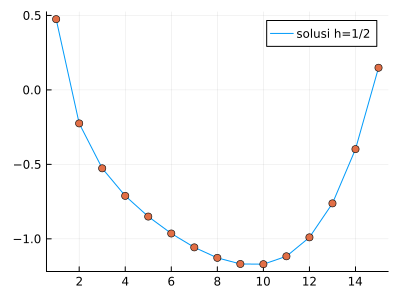

In [62]:
solu = [Y]
plot(solu, label = "solusi h=1/2",size=(400,300))
scatter!(solu, label = :none)

<center> sedangkan solusi aktualnya adalah

$$x(t)=t^2 - 0.2525826491t-2.528442297 t \ln t$$

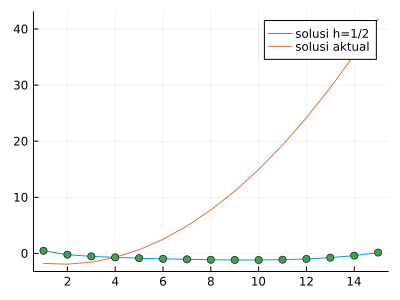

In [63]:
sol_ak = [(t^2)-0.2525826491*t-2.528442297*t for t in 1:0.5:8];
plot(solu, label = "solusi h=1/2",size=(400,300))
plot!(sol_ak, label = "solusi aktual", size=(400,300))
scatter!(solu, label = :none)

In [64]:
##################################################################################################

$$
P(h,t_i)
= \left( 2 t_i^2 + h t_i \right)
\quad
Q(h,t_i)
= \left( 2 h^2 - 4 t_i^2 \right )
\quad
R(h,t_i)
= \left( 2 t_i^2  - h t_i \right )
\quad
S(h,t_i)
= 2 h^2 t_i^2
$$

case:

$h=\frac{1}{4}=0.25$, $y_0 = 1$ dan $y_{16} = 2$.

$\begin{align}
P(\frac{1}{4} , t_i)
& = 2 t_i^2 + \frac{1}{4} t_i
\\
Q(\frac{1}{4} , t_i)
& =  2 (\frac{1}{4})^2 - 4 t_i^2
= \frac{1}{8} - 4 t_i^2
\\
R(\frac{1}{4} , t_i)
& = 2 t_i^2  - \frac{1}{4} t_i
\\
S(\frac{1}{4} , t_i)
& = 2 (\frac{1}{4})^2 t_i^2
= \frac{1}{8} t_i^2
\end{align}$

In [65]:
P_per4 = [2*(t^2)+(1/4)*t for t in 1:0.5:7.5];

In [66]:
Q_per4 = [(1/8)-4*(t^2) for t in 1:0.5:8];

In [67]:
R_per4 = [2*(t^2)-(1/4)*t for t in 1:0.5:7.5];

In [68]:
S_per4 = [(1/8)*(t^2) for t in 1:0.5:8];

In [69]:
PQR_per4 = Tridiagonal(P_per4,Q_per4,R_per4)

15×15 Tridiagonal{Float64, Vector{Float64}}:
 -3.875   1.75      ⋅        ⋅        ⋅     …      ⋅         ⋅         ⋅ 
  2.25   -8.875    4.125     ⋅        ⋅            ⋅         ⋅         ⋅ 
   ⋅      4.875  -15.875    7.5       ⋅            ⋅         ⋅         ⋅ 
   ⋅       ⋅       8.5    -24.875   11.875         ⋅         ⋅         ⋅ 
   ⋅       ⋅        ⋅      13.125  -35.875         ⋅         ⋅         ⋅ 
   ⋅       ⋅        ⋅        ⋅      18.75   …      ⋅         ⋅         ⋅ 
   ⋅       ⋅        ⋅        ⋅        ⋅            ⋅         ⋅         ⋅ 
   ⋅       ⋅        ⋅        ⋅        ⋅            ⋅         ⋅         ⋅ 
   ⋅       ⋅        ⋅        ⋅        ⋅            ⋅         ⋅         ⋅ 
   ⋅       ⋅        ⋅        ⋅        ⋅            ⋅         ⋅         ⋅ 
   ⋅       ⋅        ⋅        ⋅        ⋅     …      ⋅         ⋅         ⋅ 
   ⋅       ⋅        ⋅        ⋅        ⋅          82.875      ⋅         ⋅ 
   ⋅       ⋅        ⋅        ⋅        ⋅        -195.875    96.25   

In [70]:
B_per4 = S 
B_per4[1] = S_per4[1] - P_per4[1] #perlu diperiksa lagi
B_per4[end] = B_per4[end] - P_per4[14]
B_per4

15-element Vector{Float64}:
   -2.125
    1.125
    2.0
    3.125
    4.5
    6.125
    8.0
   10.125
   12.5
   15.125
   18.0
   21.125
   24.5
   28.125
 -198.625

In [71]:
Y_per4 = PQR_per4\B_per4

15-element Vector{Float64}:
  0.4255509479227269
 -0.27199432959967607
 -0.5445913473995784
 -0.7092553710893181
 -0.8327327076168735
 -0.9313222689975673
 -1.0065455081244326
 -1.0535739276011244
 -1.0632835460732613
 -1.0223677831316955
 -0.9126498782205336
 -0.7099077254993704
 -0.3822733163740207
  0.1118235533908777
  0.826242575160065

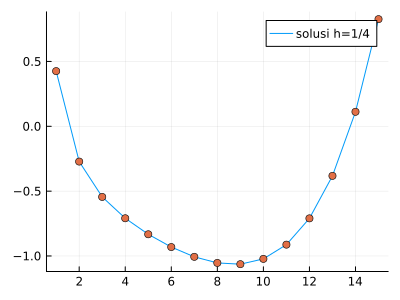

In [72]:
solu_per4 = [Y_per4]
plot(solu_per4, label = "solusi h=1/4",size=(400,300))
scatter!(solu_per4, label = :none)

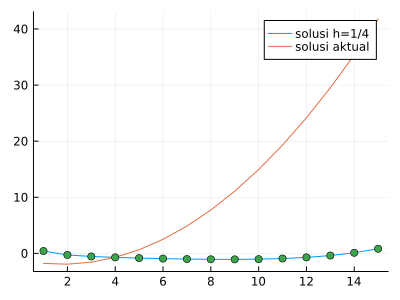

In [73]:
sol_ak = [(t^2)-0.2525826491*t-2.528442297*t for t in 1:0.5:8];
plot(solu_per4, label = "solusi h=1/4",size=(400,300))
plot!(sol_ak, label = "solusi aktual", size=(400,300))
scatter!(solu_per4, label = :none)

In [74]:
##################################################################################################

$$
P(h,t_i)
= \left( 2 t_i^2 + h t_i \right)
\quad
Q(h,t_i)
= \left( 2 h^2 - 4 t_i^2 \right )
\quad
R(h,t_i)
= \left( 2 t_i^2  - h t_i \right )
\quad
S(h,t_i)
= 2 h^2 t_i^2
$$

case:

$h=\frac{1}{16}$, $y_0 = 1$ dan $y_{64} = 2$.

therefore

$\begin{align}
P(\frac{1}{16} , t_i)
& = 2 t_i^2 + \frac{1}{16} t_i
\\
Q(\frac{1}{16} , t_i)
& =  2 (\frac{1}{16})^2 - 4 t_i^2
= \frac{1}{128} - 4 t_i^2
\\
R(\frac{1}{16} , t_i)
& = 2 t_i^2  - \frac{1}{16} t_i
\\
S(\frac{1}{16} , t_i)
& = 2 (\frac{1}{16})^2 t_i^2
= \frac{1}{128} t_i^2
\end{align}$

In [75]:
P_per16 = [2*(t^2)+(1/16)*t for t in 1:0.5:7.5];

In [76]:
Q_per16 = [(1/128)-4*(t^2) for t in 1:0.5:8];

In [77]:
R_per16 = [2*(t^2)-(1/16)*t for t in 1:0.5:7.5];

In [78]:
S_per16 = [(1/128)*(t^2) for t in 1:0.5:8];

In [79]:
PQR_per16 = Tridiagonal(P_per16,Q_per16,R_per16)

15×15 Tridiagonal{Float64, Vector{Float64}}:
 -3.99219   1.9375      ⋅          ⋅      …      ⋅          ⋅          ⋅ 
  2.0625   -8.99219    4.40625     ⋅             ⋅          ⋅          ⋅ 
   ⋅        4.59375  -15.9922     7.875          ⋅          ⋅          ⋅ 
   ⋅         ⋅         8.125    -24.9922         ⋅          ⋅          ⋅ 
   ⋅         ⋅          ⋅        12.6562         ⋅          ⋅          ⋅ 
   ⋅         ⋅          ⋅          ⋅      …      ⋅          ⋅          ⋅ 
   ⋅         ⋅          ⋅          ⋅             ⋅          ⋅          ⋅ 
   ⋅         ⋅          ⋅          ⋅             ⋅          ⋅          ⋅ 
   ⋅         ⋅          ⋅          ⋅             ⋅          ⋅          ⋅ 
   ⋅         ⋅          ⋅          ⋅             ⋅          ⋅          ⋅ 
   ⋅         ⋅          ⋅          ⋅      …      ⋅          ⋅          ⋅ 
   ⋅         ⋅          ⋅          ⋅           84.0938      ⋅          ⋅ 
   ⋅         ⋅          ⋅          ⋅         -195.992     97.5625  

In [80]:
B_per16 = S 
B_per16[1] = S_per16[1] - P_per16[1] #perlu diperiksa lagi
B_per16[end] = B_per16[end] - P_per16[14]
B_per16

15-element Vector{Float64}:
   -2.0546875
    1.125
    2.0
    3.125
    4.5
    6.125
    8.0
   10.125
   12.5
   15.125
   18.0
   21.125
   24.5
   28.125
 -311.59375

In [81]:
Y_per16 = PQR_per16\B_per16

15-element Vector{Float64}:
  0.3571768166187259
 -0.32452680124125427
 -0.5741578507376371
 -0.7226977790973073
 -0.832143057319711
 -0.9153125714623995
 -0.9712664408624262
 -0.9930104431587354
 -0.9691436278839384
 -0.883735028301561
 -0.7154700545108719
 -0.43633291604246527
 -0.009866473608867428
  0.6110302617011416
  1.4868464486891844

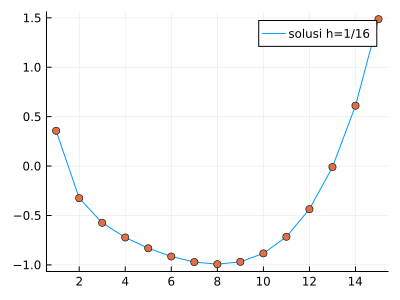

In [82]:
solu_per16 = [Y_per16]
plot(solu_per16, label = "solusi h=1/16",size=(400,300))
scatter!(solu_per16, label = :none)

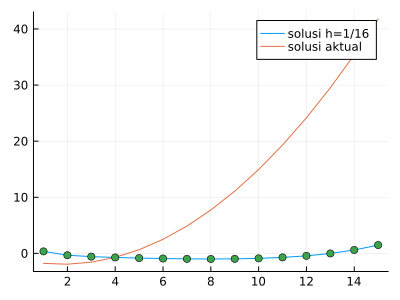

In [83]:
sol_ak = [(t^2)-0.2525826491*t-2.528442297*t for t in 1:0.5:8];
plot(solu_per16, label = "solusi h=1/16",size=(400,300))
plot!(sol_ak, label = "solusi aktual", size=(400,300))
scatter!(solu_per16, label = :none)